In [1]:
from tenzing.core.model_implementations.typesets import tenzing_standard, tenzing_geometry_set
from tenzing.core.typesets import infer_type
from tenzing.core.model_implementations import *
import pandas as pd
import numpy as np
import networkx as nx
import datetime
import itertools


%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
df = pd.DataFrame({'item_id': [1, 1, 3], 
                   'item_cost': [2.1, 3.5, 4], 
                   'item_name': ['orange', 'orange', 'apple'],
                   'sale_date': pd.to_datetime([datetime.date(2011,1,1), datetime.date(2012, 1, 1), datetime.date(2013,1,1)]),
                   'store_location': pd.Series(['POINT (12 42)', 'POINT (100 42.723)', 'POINT (0 0)']),
                   'COGS': pd.Series([np.nan, 1.1, 2.1]).astype(str),
                   'is_still_available': [True, False, True],
                   'is_expired': ['True', 'false', 'False'],
                   'complex_record': [np.complex(1, 2), np.complex(3,4), np.complex(5, 6)]
                   })
df


,item_id,item_cost,item_name,sale_date,store_location,COGS,is_still_available,is_expired,complex_record
0,1,2.1,orange,2011-01-01,POINT (12 42),nan,True,True,(1+2j)
1,1,3.5,orange,2012-01-01,POINT (100 42.723),1.1,False,false,(3+4j)
2,3,4.0,apple,2013-01-01,POINT (0 0),2.1,True,False,(5+6j)


In [3]:
ts = tenzing_geometry_set()
_ = ts.prep(df)

ts.summary_report(df)

Number of Observations,3
Number of Variables,9
tenzing_integer,1
tenzing_float,1
tenzing_string,4
tenzing_timestamp,1
tenzing_bool,1
tenzing_complex,1
nunique,2.0
mean,1.67
std,1.15


In [4]:
ts.column_type_map

{'item_id': tenzing_integer,
 'item_cost': tenzing_float,
 'item_name': tenzing_string,
 'sale_date': tenzing_timestamp,
 'store_location': tenzing_string,
 'COGS': tenzing_string,
 'is_still_available': tenzing_bool,
 'is_expired': tenzing_string}

In [5]:
ts.infer_types(df)

{'item_id': tenzing_integer,
 'item_cost': tenzing_float,
 'item_name': tenzing_string,
 'sale_date': tenzing_timestamp,
 'store_location': tenzing_geometry,
 'COGS': tenzing_float,
 'is_still_available': tenzing_bool,
 'is_expired': tenzing_bool}

In [6]:
ts.cast_to_inferred_types(df)

,item_id,item_cost,item_name,sale_date,store_location,COGS,is_still_available,is_expired
0,1,2.1,orange,2011-01-01,POINT (12 42),NaN,True,True
1,1,3.5,orange,2012-01-01,POINT (100 42.723),1.1,False,False
2,3,4.0,apple,2013-01-01,POINT (0 0),2.1,True,False


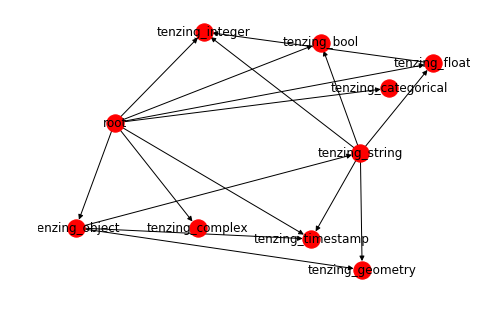

In [7]:
nx.draw_kamada_kawai(ts.relation_map, with_labels=True)